In [2]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [44]:
analysis = scripts.Analysis()

In [45]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1e-20_max_5e-18_ng_11_dlogN_.25_.25_.175_.02_.02_.02_.02_.02_.1_.125',
                          'wgt_1_.85_.7_.6_.5_.5_.5_.5_.5_.4_.4',
                          'midlatitude_summer',
                          'iv_dependent_B')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [46]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_1e-20_max_5e-18_ng_11_dlogN_.25_.25_.175_.02_.02_.02_.02_.02_.1_.125',
                               'wgt_1_.85_.7_.6_.5_.5_.5_.5_.5_.4_.4',
                               'midlatitude_summer',
                               'iv_dependent_B')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [47]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 11 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [48]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [49]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [50]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [51]:
fig.display_hrefanchor()

In [52]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [53]:
table_dgdgs.display_hrefanchor()

In [54]:
for g in range(1, 11 + 1):
    s = 'Table: flux. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

In [55]:
for g in range(1, 11 + 1):
    s = 'Table: cooling rate. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

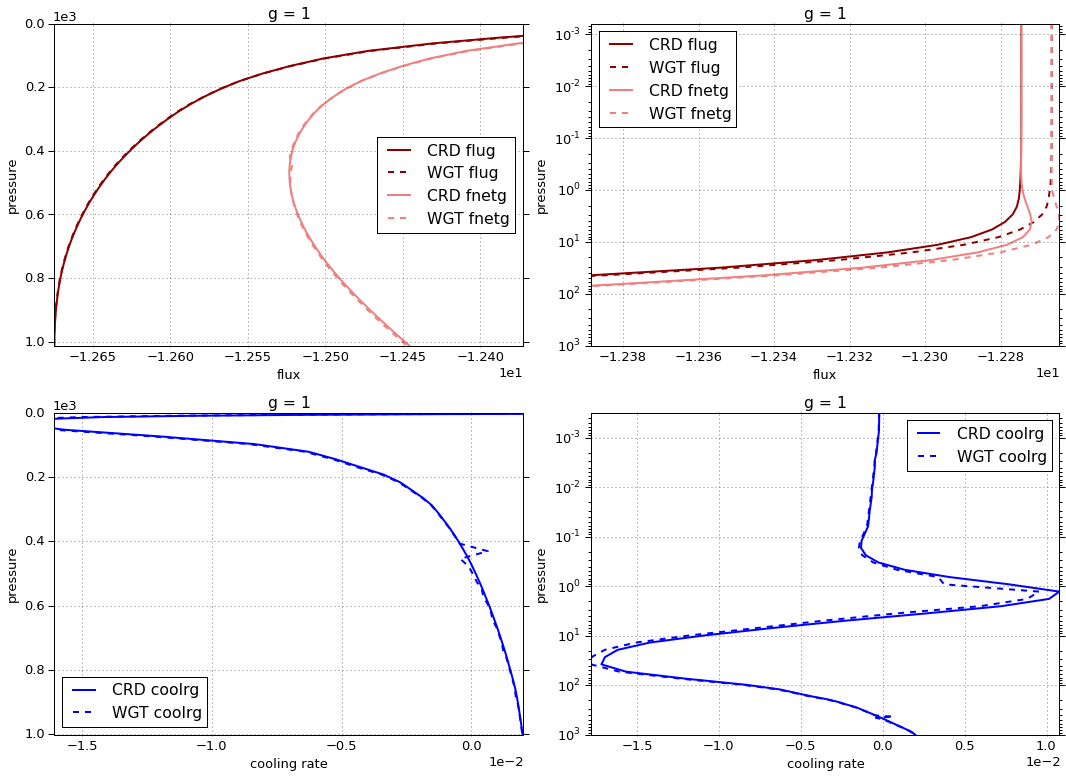

# Figure: flux, cooling rate. g-group 2

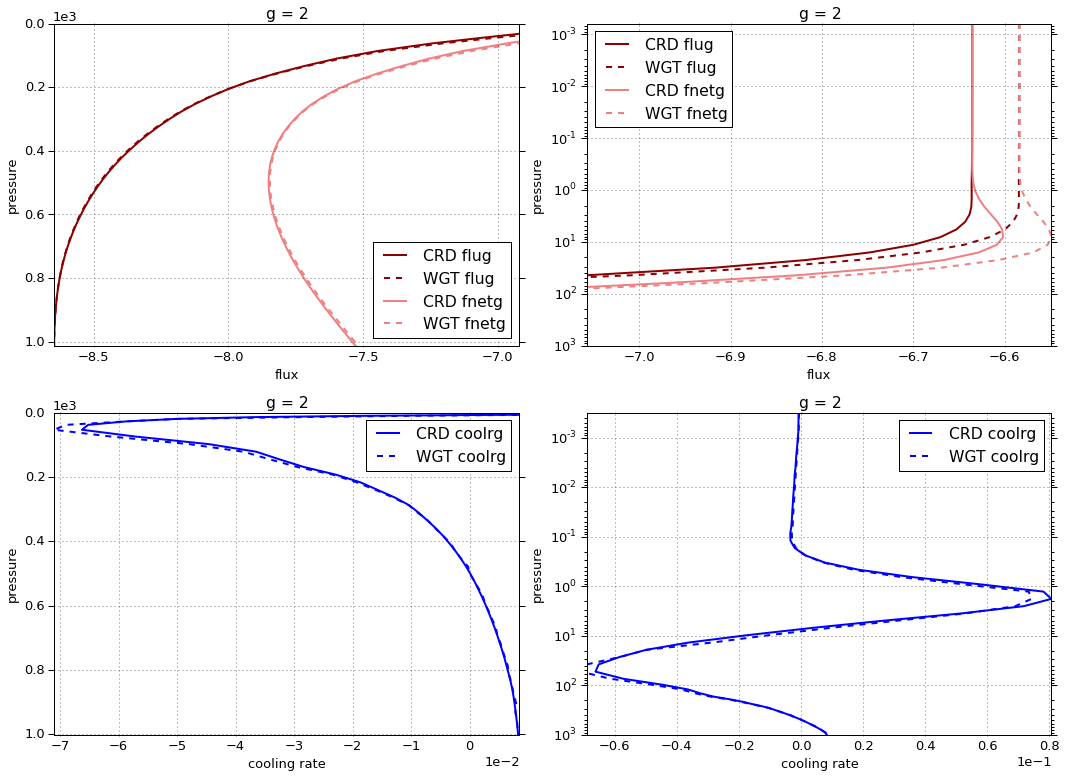

# Figure: flux, cooling rate. g-group 3

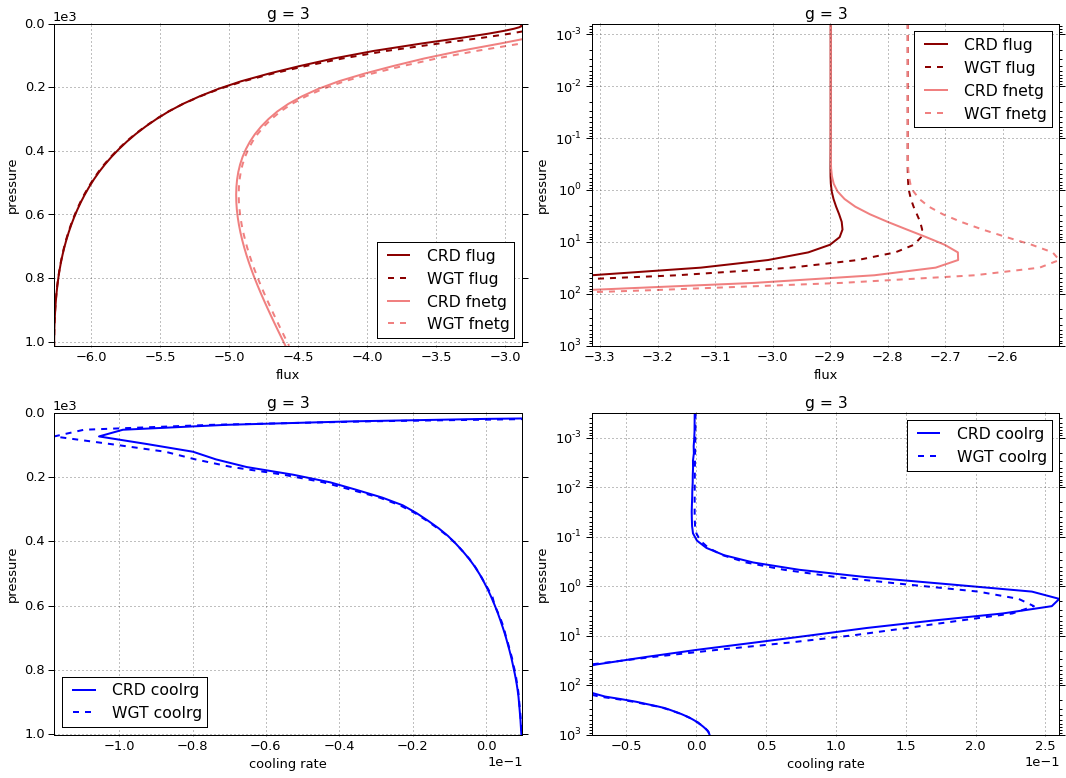

# Figure: flux, cooling rate. g-group 4

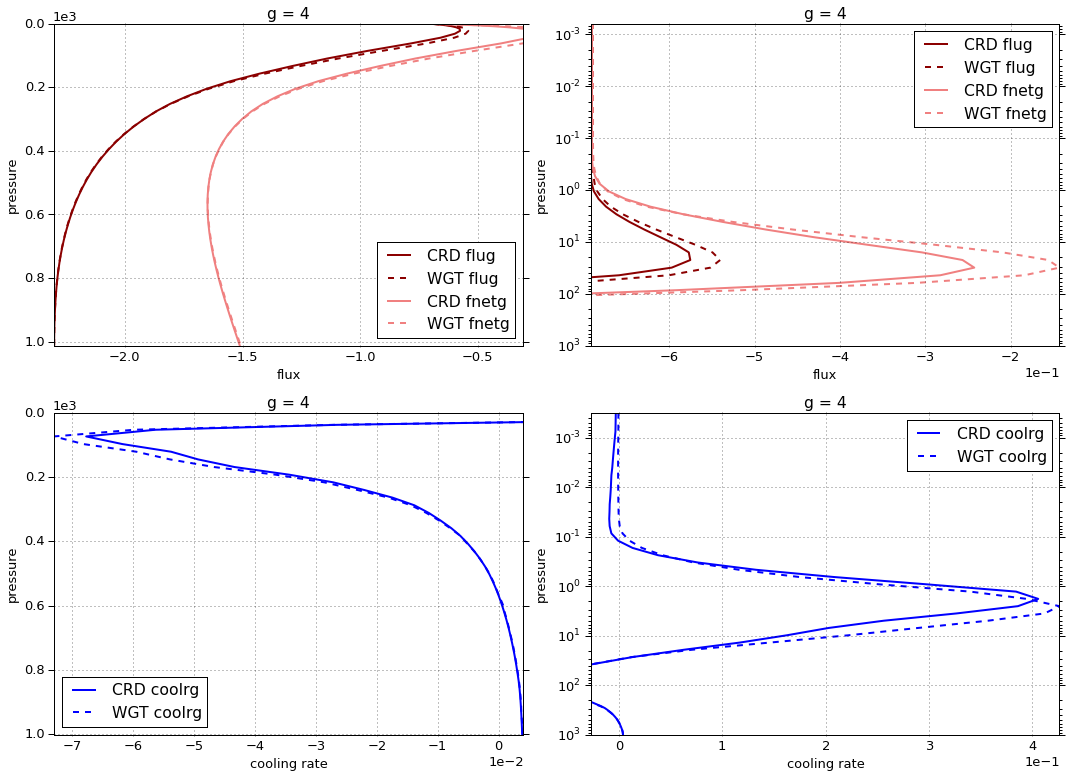

# Figure: flux, cooling rate. g-group 5

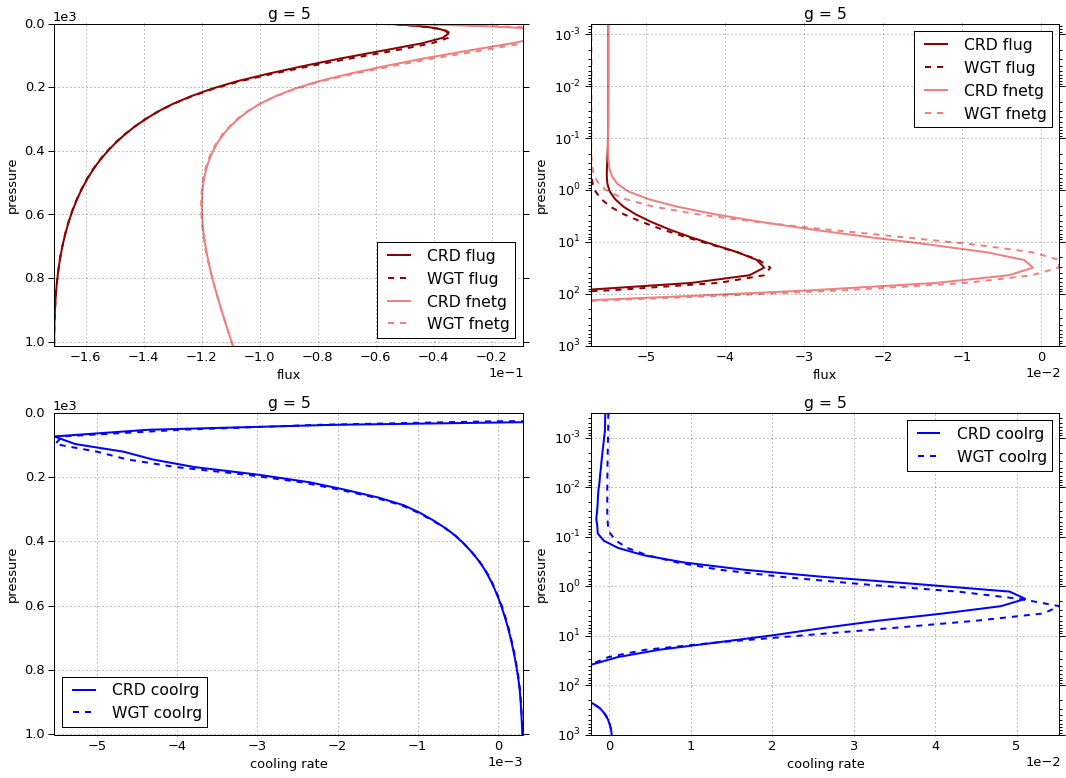

# Figure: flux, cooling rate. g-group 6

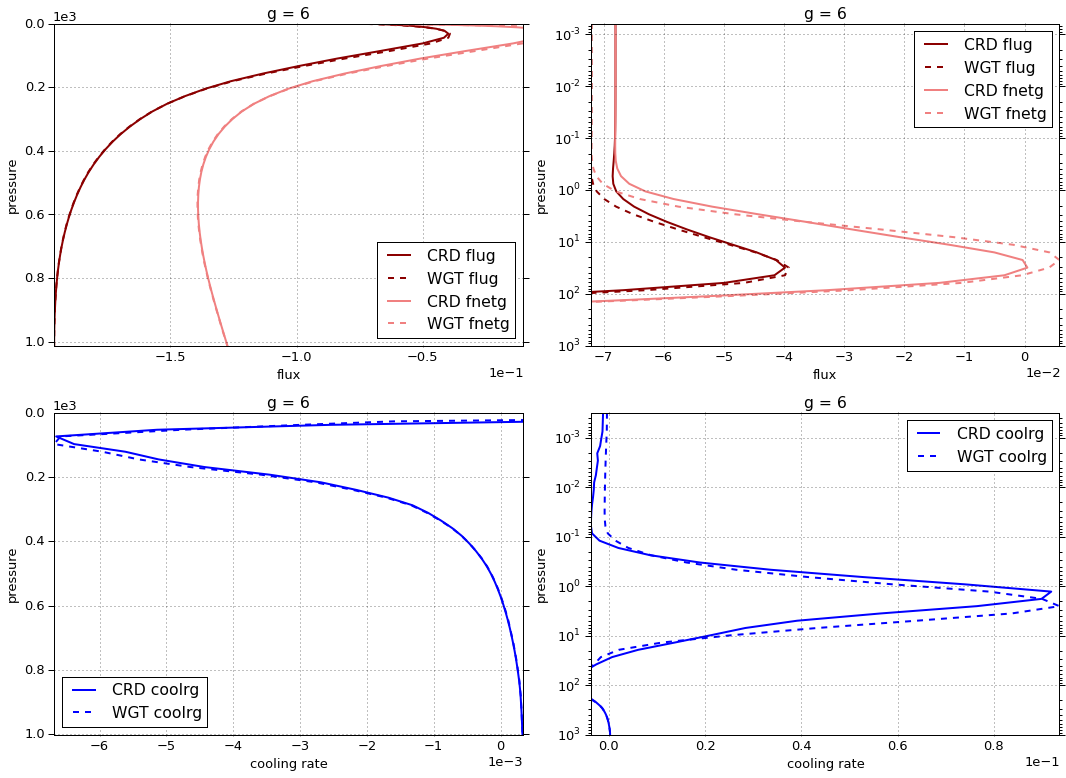

# Figure: flux, cooling rate. g-group 7

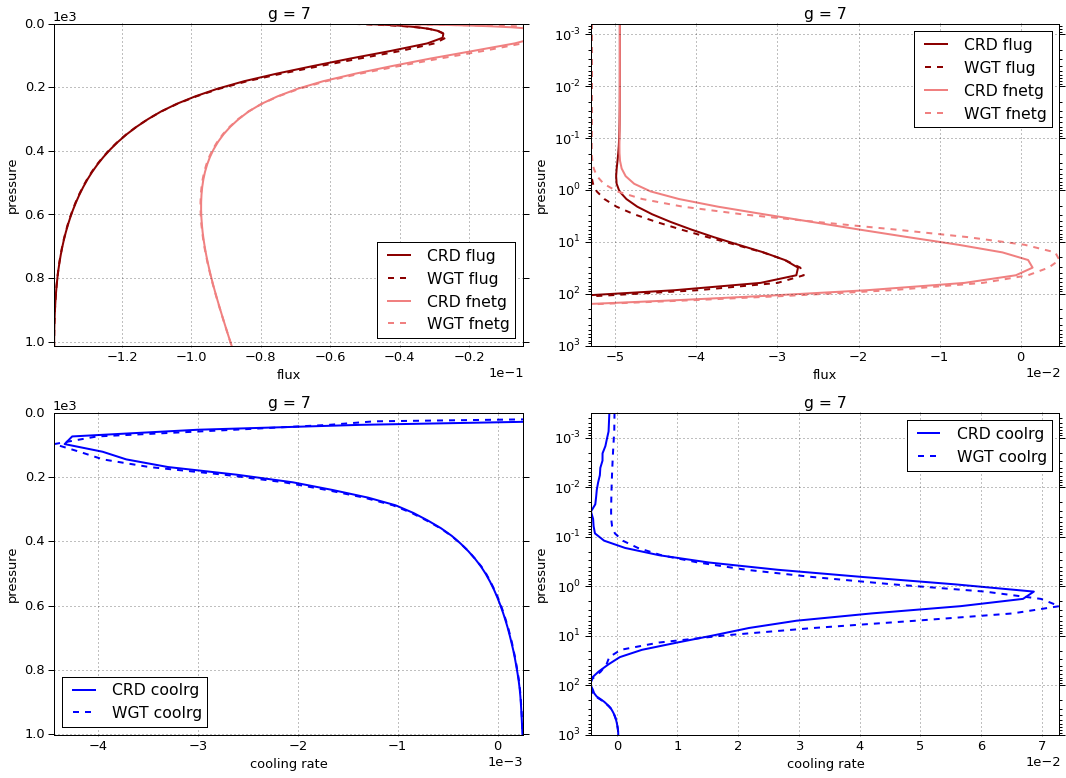

# Figure: flux, cooling rate. g-group 8

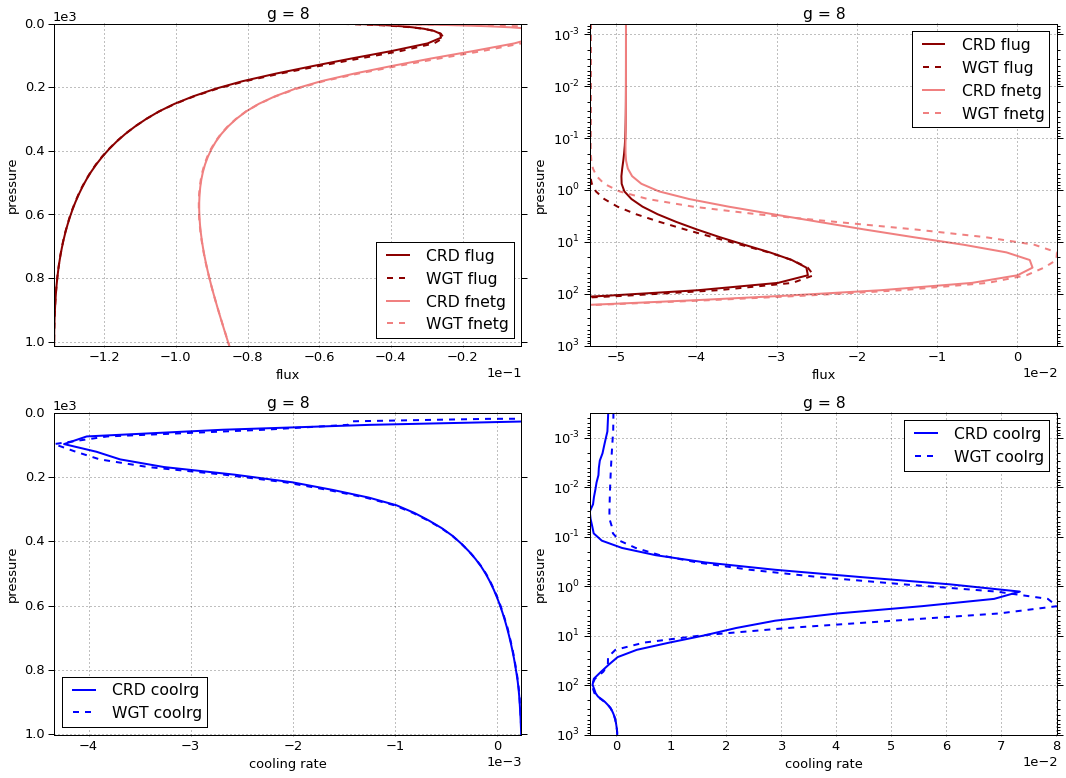

# Figure: flux, cooling rate. g-group 9

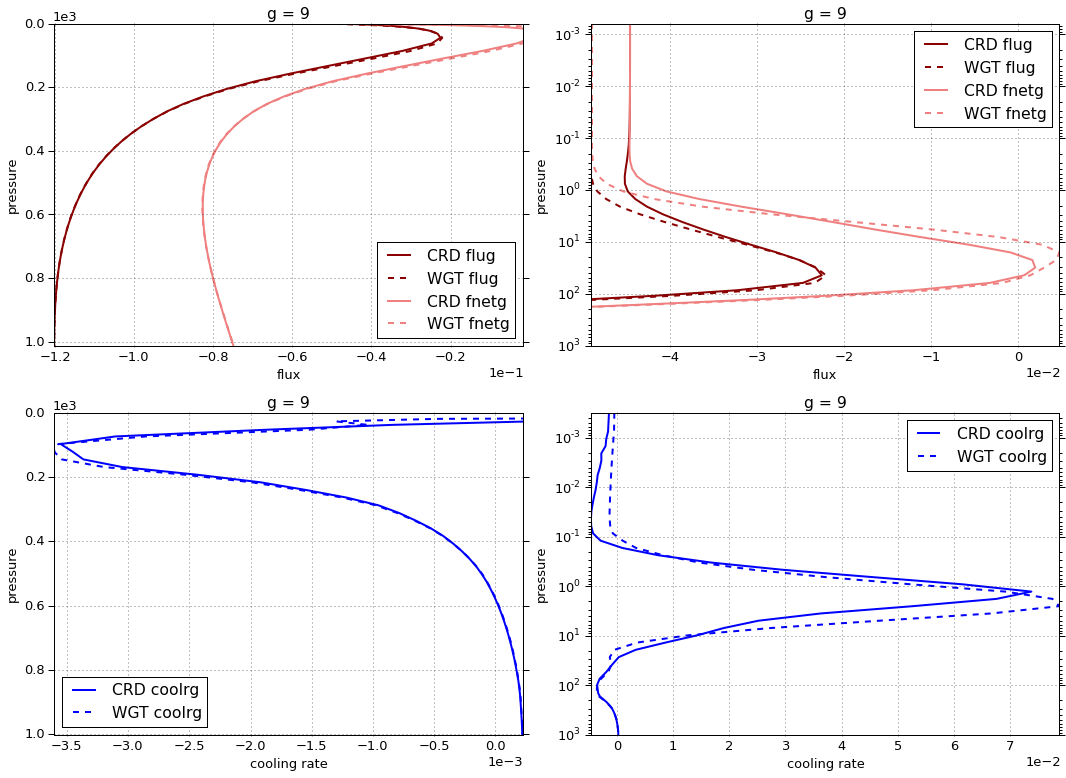

# Figure: flux, cooling rate. g-group 10

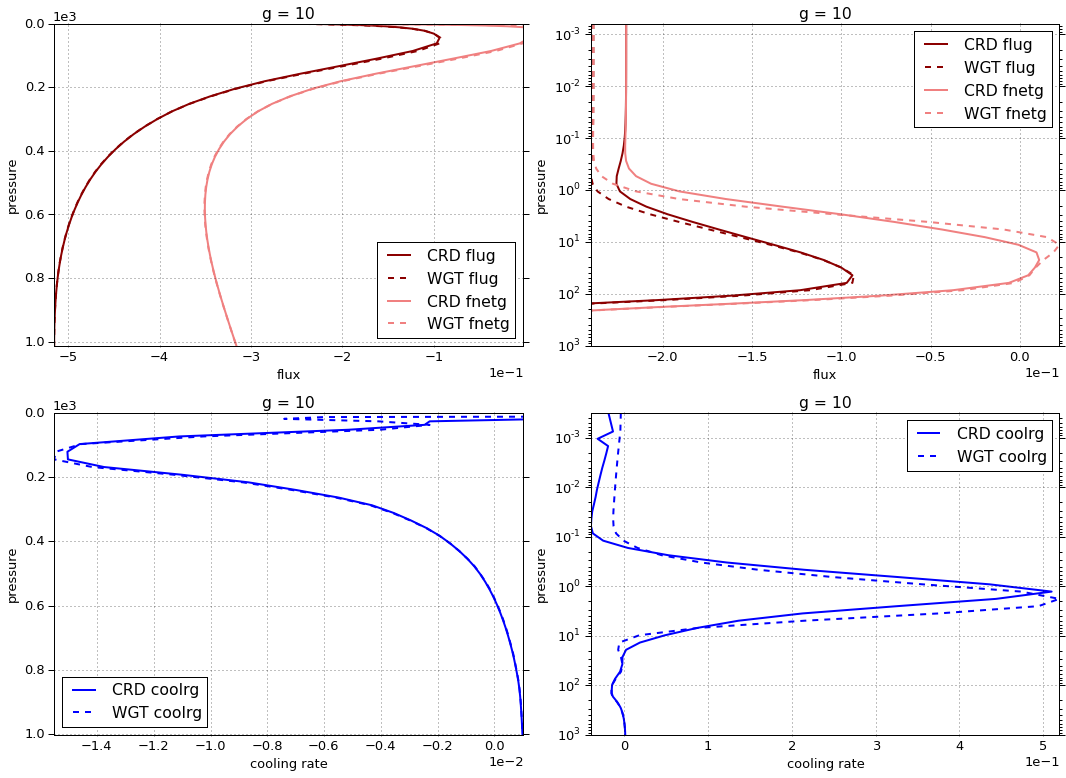

# Figure: flux, cooling rate. g-group 11

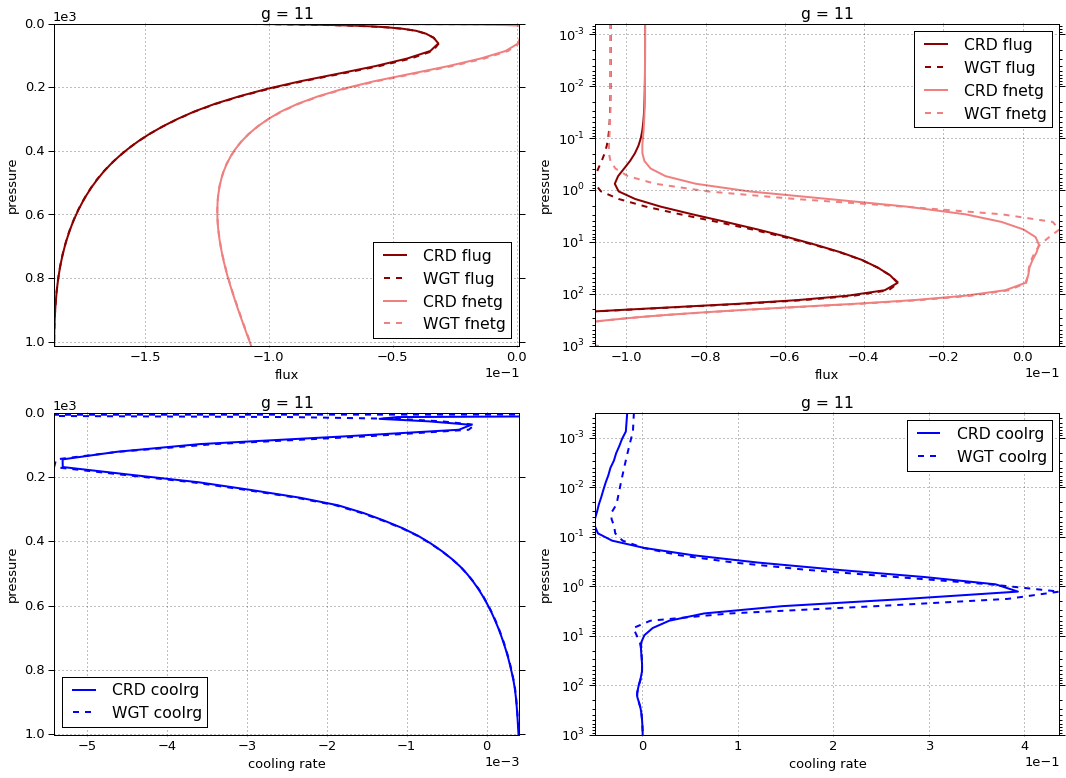

# Figure: flux, cooling rate. g-group total

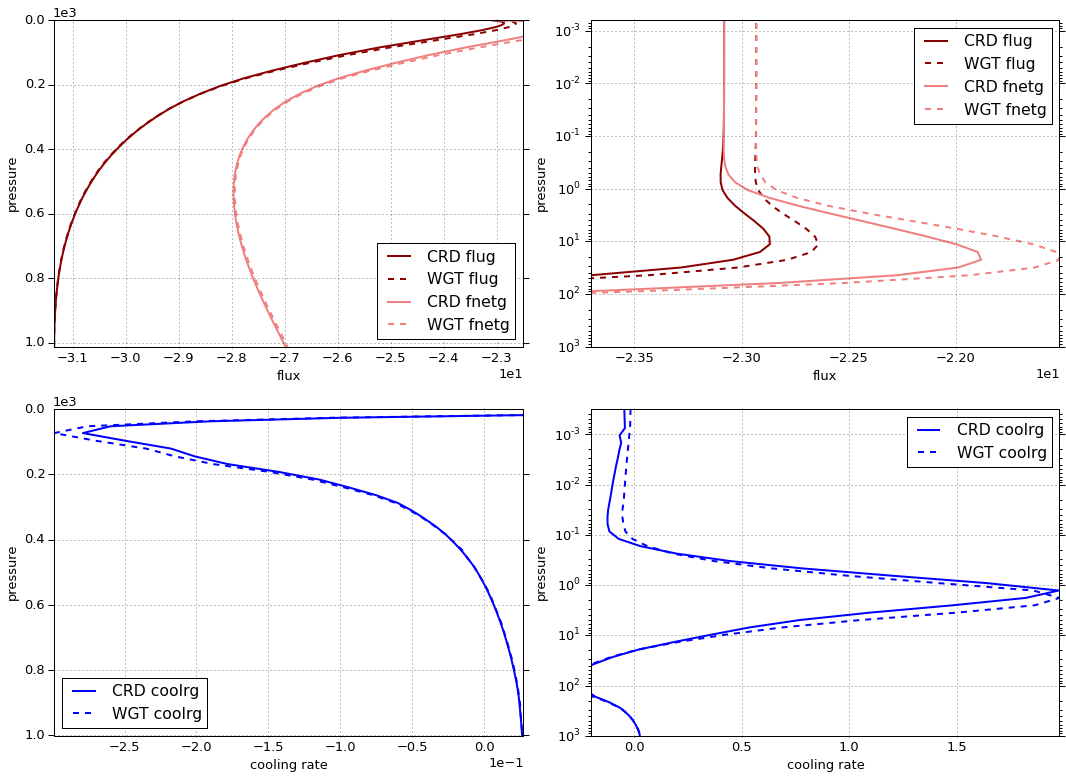

In [56]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [57]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g  pressure level                                
1  0        1     -12.274527  0.000000 -12.274527
   1013     76    -12.674908  0.229195 -12.445712
2  0        1      -6.635504  0.000000  -6.635504
   1013     76     -8.646580  1.118645  -7.527935
3  0        1      -2.898934  0.000000  -2.898934
   1013     76     -6.269207  1.676264  -4.592942
4  0        1      -0.690935  0.000000  -0.690935
   1013     76     -2.301027  0.789364  -1.511663
5  0        1      -0.054783  0.000000  -0.054783
   1013     76     -0.170849  0.061593  -0.109256
6  0        1      -0.068058  0.000000  -0.068058
   1013     76     -0.196017  0.068657  -0.127360
7  0        1      -0.049441  0.000000  -0.049441
   1013     76     -0.139551  0.051115  -0.088435
8  0        1      -0.048776  0.000000  -0.048776
   1013     76     -0.134004  0.048842  -0.085162
9  0        1      -0.044595  0.000000  -0.044595
   1013     76     -0.120204  0.045314  -0.074890
10 0        1      -0.220544  0.000000  -0.220544
   1013     76     -0.515207  0.199278  -0.315929
11 0        1      -0.095270  0.000000  -0.095270
   1013     76     -0.186683  0.079533  -0.107150


WGT


flug      fldg      fnetg
g  pressure level                                
1  0        1     -12.266461  0.000000 -12.266461
   1013     76    -12.675043  0.227662 -12.447381
2  0        1      -6.583969  0.000000  -6.583969
   1013     76     -8.646341  1.128738  -7.517603
3  0        1      -2.764949  0.000000  -2.764949
   1013     76     -6.269327  1.702435  -4.566892
4  0        1      -0.689572  0.000000  -0.689572
   1013     76     -2.301023  0.793441  -1.507583
5  0        1      -0.056949  0.000000  -0.056949
   1013     76     -0.170833  0.061591  -0.109243
6  0        1      -0.072063  0.000000  -0.072063
   1013     76     -0.196019  0.068592  -0.127427
7  0        1      -0.052927  0.000000  -0.052927
   1013     76     -0.139548  0.051109  -0.088439
8  0        1      -0.053182  0.000000  -0.053182
   1013     76     -0.134006  0.048877  -0.085129
9  0        1      -0.048964  0.000000  -0.048964
   1013     76     -0.120194  0.045374  -0.074821
10 0        1      -0.238924  0.000000  -0.238924
   1013     76     -0.515207  0.199237  -0.315970
11 0        1      -0.103957  0.000000  -0.103957
   1013     76     -0.186696  0.079703  -0.106993


WGT - CRD


flug      fldg     fnetg
g  pressure level                                  
1  0        1      8.066000e-03  0.000000  0.008066
   1013     76    -1.350000e-04 -0.001533 -0.001669
2  0        1      5.153490e-02  0.000000  0.051535
   1013     76     2.393000e-04  0.010093  0.010332
3  0        1      1.339853e-01  0.000000  0.133985
   1013     76    -1.201000e-04  0.026171  0.026051
4  0        1      1.363220e-03  0.000000  0.001363
   1013     76     3.300000e-06  0.004077  0.004080
5  0        1     -2.166141e-03  0.000000 -0.002166
   1013     76     1.560000e-05 -0.000002  0.000014
6  0        1     -4.005359e-03  0.000000 -0.004005
   1013     76    -1.940000e-06 -0.000065 -0.000067
7  0        1     -3.485670e-03  0.000000 -0.003486
   1013     76     2.930000e-06 -0.000007 -0.000004
8  0        1     -4.405964e-03  0.000000 -0.004406
   1013     76    -2.170000e-06  0.000035  0.000033
9  0        1     -4.368668e-03  0.000000 -0.004369
   1013     76     9.490000e-06  0.000060  0.000069
10 0        1     -1.837991e-02  0.000000 -0.018380
   1013     76     6.200000e-07 -0.000042 -0.000041
11 0        1     -8.686923e-03  0.000000 -0.008687
   1013     76    -1.355000e-05  0.000170  0.000157

# Table: cooling rate. g-groups 


CRD


coolrg
g  pressure    layer          
1  0.000312    1     -0.000213
   1001.112500 75     0.001983
2  0.000312    1     -0.000803
   1001.112500 75     0.008280
3  0.000312    1     -0.001036
   1001.112500 75     0.009587
4  0.000312    1     -0.003103
   1001.112500 75     0.003873
5  0.000312    1     -0.000474
   1001.112500 75     0.000304
6  0.000312    1     -0.001127
   1001.112500 75     0.000328
7  0.000312    1     -0.001217
   1001.112500 75     0.000250
8  0.000312    1     -0.001396
   1001.112500 75     0.000237
9  0.000312    1     -0.001445
   1001.112500 75     0.000221
10 0.000312    1     -0.019095
   1001.112500 75     0.000985
11 0.000312    1     -0.015734
   1001.112500 75     0.000400


WGT


coolrg
g  pressure    layer          
1  0.000312    1     -0.000225
   1001.112500 75     0.001976
2  0.000312    1     -0.000702
   1001.112500 75     0.008349
3  0.000312    1     -0.000457
   1001.112500 75     0.009744
4  0.000312    1     -0.000584
   1001.112500 75     0.003923
5  0.000312    1     -0.000110
   1001.112500 75     0.000306
6  0.000312    1     -0.000323
   1001.112500 75     0.000330
7  0.000312    1     -0.000371
   1001.112500 75     0.000251
8  0.000312    1     -0.000449
   1001.112500 75     0.000238
9  0.000312    1     -0.000489
   1001.112500 75     0.000222
10 0.000312    1     -0.004237
   1001.112500 75     0.000989
11 0.000312    1     -0.008762
   1001.112500 75     0.000402


WGT - CRD


coolrg
g  pressure    layer              
1  0.000312    1     -1.227769e-05
   1001.112500 75    -6.815500e-06
2  0.000312    1      1.005200e-04
   1001.112500 75     6.948970e-05
3  0.000312    1      5.795910e-04
   1001.112500 75     1.569974e-04
4  0.000312    1      2.519341e-03
   1001.112500 75     5.011350e-05
5  0.000312    1      3.644221e-04
   1001.112500 75     2.364560e-06
6  0.000312    1      8.041190e-04
   1001.112500 75     1.545720e-06
7  0.000312    1      8.459760e-04
   1001.112500 75     1.088620e-06
8  0.000312    1      9.471189e-04
   1001.112500 75     8.556800e-07
9  0.000312    1      9.565157e-04
   1001.112500 75     1.609030e-06
10 0.000312    1      1.485818e-02
   1001.112500 75     3.605980e-06
11 0.000312    1      6.972532e-03
   1001.112500 75     2.201130e-06

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-23.081367,0.000000,-23.081367
1013,76,-31.354235,4.367802,-26.986433



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-22.931916,0.000000,-22.931916
1013,76,-31.354237,4.406758,-26.947479



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,0.149451,0.000000,0.149451
1013,76,-0.000002,0.038956,0.038954


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.045645
1001.112500,75,0.026448



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.016708
1001.112500,75,0.026731



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.028936
1001.112500,75,0.000283


In [58]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.410750,0.402196
2,0.271208,0.277484
3,0.198167,0.200412
4,0.073208,0.073349
5,0.005458,0.005436
6,0.006208,0.006260
7,0.004458,0.004440
8,0.004250,0.004277
9,0.003833,0.003827


In [59]:
writer = pd.ExcelWriter('results.xlsx')

In [60]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 1

crd                                 wgt                \
                  flug          fldg      fnetg       flug          fldg   
pressure                                                                   
0.000000    -12.274527  0.000000e+00 -12.274527 -12.266461  0.000000e+00   
0.000624    -12.274527  3.367796e-09 -12.274527 -12.266461  3.271619e-09   
0.000876    -12.274527  4.909586e-09 -12.274527 -12.266461  4.769080e-09   
0.001229    -12.274527  7.591089e-09 -12.274527 -12.266461  7.372227e-09   
0.001723    -12.274527  1.213470e-08 -12.274527 -12.266461  1.178092e-08   
0.002417    -12.274527  1.966105e-08 -12.274527 -12.266461  1.908028e-08   
0.003391    -12.274527  3.192088e-08 -12.274527 -12.266461  3.096465e-08   
0.004757    -12.274527  5.162484e-08 -12.274527 -12.266461  5.005611e-08   
0.006672    -12.274528  8.295111e-08 -12.274528 -12.266462  8.039426e-08   
0.009359    -12.274528  1.323180e-07 -12.274528 -12.266462  1.281816e-07   
0.013128    -12.274528  2.095427e-07 -12.274528 -12.266462  2.029008e-07   
0.018415    -12.274529  3.296169e-07 -12.274528 -12.266463  3.190260e-07   
0.025830    -12.274530  5.153210e-07 -12.274529 -12.266464  4.985418e-07   
0.036232    -12.274531  8.013245e-07 -12.274530 -12.266465  7.748930e-07   
0.050823    -12.274533  1.243887e-06 -12.274532 -12.266467  1.202351e-06   
0.071291    -12.274536  1.985078e-06 -12.274534 -12.266470  1.917341e-06   
0.100000    -12.274541  3.549031e-06 -12.274537 -12.266475  3.420543e-06   
0.140271    -12.274551  7.300089e-06 -12.274544 -12.266486  7.008735e-06   
0.196760    -12.274569  1.607600e-05 -12.274553 -12.266504  1.536891e-05   
0.275997    -12.274598  3.601538e-05 -12.274562 -12.266534  3.429924e-05   
0.387100    -12.274646  8.032617e-05 -12.274566 -12.266584  7.625899e-05   
0.543100    -12.274718  1.771443e-04 -12.274541 -12.266660  1.677848e-04   
0.761700    -12.274819  3.833877e-04 -12.274436 -12.266767  3.625758e-04   
1.068500    -12.274960  8.045655e-04 -12.274156 -12.267028  7.603682e-04   
1.498800    -12.275190  1.583847e-03 -12.273606 -12.267280  1.498040e-03   
2.102400    -12.275690  2.809960e-03 -12.272880 -12.267814  2.663353e-03   
2.949000    -12.276769  4.615724e-03 -12.272154 -12.268943  4.390222e-03   
4.136600    -12.278823  7.041668e-03 -12.271782 -12.271171  6.730602e-03   
5.802500    -12.282283  1.004879e-02 -12.272234 -12.274823  9.662103e-03   
8.139200    -12.287833  1.373570e-02 -12.274098 -12.280575  1.329149e-02   
...                ...           ...        ...        ...           ...   
323.525000  -12.608299  9.427058e-02 -12.514028 -12.608877  9.427422e-02   
347.300000  -12.614383  9.741363e-02 -12.516969 -12.614972  9.737198e-02   
371.075000  -12.619985  1.006972e-01 -12.519288 -12.620578  1.006151e-01   
394.850000  -12.625168  1.041251e-01 -12.521043 -12.625757  1.039986e-01   
418.625000  -12.630007  1.077285e-01 -12.522278 -12.630586  1.075488e-01   
442.400000  -12.634495  1.114698e-01 -12.523026 -12.635060  1.138308e-01   
466.175000  -12.638633  1.153207e-01 -12.523313 -12.639180  1.167733e-01   
489.950000  -12.642425  1.192463e-01 -12.523179 -12.642951  1.202844e-01   
513.725000  -12.645921  1.232654e-01 -12.522655 -12.646424  1.239466e-01   
537.500000  -12.649164  1.274068e-01 -12.521757 -12.649643  1.277716e-01   
561.275000  -12.652161  1.316584e-01 -12.520502 -12.652614  1.318968e-01   
585.050000  -12.654931  1.360160e-01 -12.518915 -12.655358  1.359798e-01   
608.825000  -12.657488  1.404950e-01 -12.516993 -12.657889  1.403518e-01   
632.600000  -12.659834  1.450759e-01 -12.514758 -12.660209  1.448285e-01   
656.375000  -12.661979  1.497579e-01 -12.512221 -12.662328  1.492775e-01   
680.150000  -12.663931  1.545445e-01 -12.509386 -12.664254  1.539728e-01   
703.925000  -12.665690  1.594209e-01 -12.506269 -12.665989  1.587590e-01   
727.700000  -12.667265  1.643830e-01 -12.502882 -12.667540  1.636336e-01   
751.475000  -12.668663  1.694279e-01 -12.499235 -12.668916  1.68495

In [61]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 2

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -6.635504  0.000000e+00 -6.635504 -6.583969  0.000000e+00   
0.000624    -6.635504  1.908943e-08 -6.635504 -6.583969  1.723913e-08   
0.000876    -6.635504  2.782995e-08 -6.635504 -6.583969  2.514414e-08   
0.001229    -6.635504  4.303485e-08 -6.635504 -6.583969  3.888894e-08   
0.001723    -6.635504  6.880457e-08 -6.635504 -6.583969  6.217126e-08   
0.002417    -6.635505  1.115007e-07 -6.635504 -6.583970  1.007261e-07   
0.003391    -6.635505  1.810629e-07 -6.635505 -6.583970  1.635105e-07   
0.004757    -6.635505  2.928825e-07 -6.635505 -6.583970  2.643902e-07   
0.006672    -6.635506  4.706856e-07 -6.635505 -6.583971  4.247343e-07   
0.009359    -6.635507  7.509209e-07 -6.635506 -6.583972  6.773678e-07   
0.013128    -6.635508  1.189341e-06 -6.635507 -6.583973  1.072500e-06   
0.018415    -6.635511  1.871084e-06 -6.635509 -6.583975  1.686820e-06   
0.025830    -6.635514  2.925524e-06 -6.635511 -6.583978  2.636900e-06   
0.036232    -6.635519  4.549549e-06 -6.635515 -6.583982  4.100256e-06   
0.050823    -6.635527  7.062816e-06 -6.635520 -6.583989  6.365019e-06   
0.071291    -6.635539  1.127183e-05 -6.635527 -6.584000  1.015332e-05   
0.100000    -6.635559  2.013757e-05 -6.635539 -6.584018  1.810042e-05   
0.140271    -6.635597  4.128175e-05 -6.635556 -6.584051  3.695191e-05   
0.196760    -6.635660  9.028036e-05 -6.635570 -6.584105  8.044014e-05   
0.275997    -6.635758  2.001172e-04 -6.635558 -6.584190  1.776045e-04   
0.387100    -6.635899  4.399987e-04 -6.635459 -6.584309  3.894120e-04   
0.543100    -6.636068  9.531345e-04 -6.635115 -6.584450  8.423971e-04   
0.761700    -6.636211  2.019233e-03 -6.634192 -6.584558  1.785282e-03   
1.068500    -6.636241  4.145325e-03 -6.632096 -6.584551  3.675880e-03   
1.498800    -6.636163  8.045464e-03 -6.628118 -6.584324  7.186390e-03   
2.102400    -6.636553  1.419988e-02 -6.622353 -6.584676  1.284564e-02   
2.949000    -6.638435  2.327398e-02 -6.615161 -6.586347  2.143706e-02   
4.136600    -6.643341  3.543368e-02 -6.607907 -6.590814  3.334708e-02   
5.802500    -6.653111  5.042134e-02 -6.602690 -6.599926  4.854733e-02   
8.139200    -6.670489  6.870732e-02 -6.601782 -6.616469  6.760080e-02   
...               ...           ...       ...       ...           ...   
323.525000  -8.259515  4.809625e-01 -7.778553 -8.264215  4.890159e-01   
347.300000  -8.297377  4.984986e-01 -7.798879 -8.302235  5.069611e-01   
371.075000  -8.331877  5.166552e-01 -7.815222 -8.336739  5.248870e-01   
394.850000  -8.363460  5.354177e-01 -7.828043 -8.368249  5.436247e-01   
418.625000  -8.392635  5.548815e-01 -7.837754 -8.397383  5.636077e-01   
442.400000  -8.419431  5.748555e-01 -7.844576 -8.423893  5.832752e-01   
466.175000  -8.443896  5.951517e-01 -7.848744 -8.448185  6.034766e-01   
489.950000  -8.466107  6.155994e-01 -7.850507 -8.470077  6.245408e-01   
513.725000  -8.486400  6.362930e-01 -7.850107 -8.490183  6.448254e-01   
537.500000  -8.505069  6.573422e-01 -7.847726 -8.508519  6.655843e-01   
561.275000  -8.522178  6.786611e-01 -7.843517 -8.525322  6.869469e-01   
585.050000  -8.537867  7.003014e-01 -7.837566 -8.540707  7.087693e-01   
608.825000  -8.552240  7.222634e-01 -7.829977 -8.554806  7.304614e-01   
632.600000  -8.565331  7.444781e-01 -7.820853 -8.567582  7.526650e-01   
656.375000  -8.577211  7.669401e-01 -7.810271 -8.579188  7.752090e-01   
680.150000  -8.587942  7.896433e-01 -7.798299 -8.589617  7.983012e-01   
703.925000  -8.597551  8.125129e-01 -7.785039 -8.598986  8.209469e-01   
727.700000  -8.606094  8.355306e-01 -7.770563 -8.607274  8.440139e-01   
751.475000  -8.613628  8.587220e-01 -7.754906 -8.614585  8.671803e-01   
775.250000  -8.620193  8.820393e-01 -7.738153 -8.620942  8.906460e-01   
799.025000  -8.625828  9.054141e-01 -7.720414 -8.626379  9.144080e-01   
822

In [62]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 3

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -2.898934  0.000000e+00 -2.898934 -2.764949  0.000000e+00   
0.000624    -2.898934  4.923515e-08 -2.898934 -2.764949  3.380825e-08   
0.000876    -2.898934  7.178690e-08 -2.898934 -2.764949  4.932632e-08   
0.001229    -2.898934  1.110519e-07 -2.898934 -2.764949  7.635441e-08   
0.001723    -2.898935  1.776556e-07 -2.898934 -2.764949  1.222206e-07   
0.002417    -2.898935  2.880967e-07 -2.898935 -2.764949  1.983123e-07   
0.003391    -2.898935  4.681734e-07 -2.898935 -2.764949  3.224522e-07   
0.004757    -2.898936  7.578631e-07 -2.898935 -2.764950  5.222890e-07   
0.006672    -2.898937  1.218835e-06 -2.898936 -2.764950  8.405303e-07   
0.009359    -2.898938  1.945892e-06 -2.898937 -2.764951  1.342934e-06   
0.013128    -2.898941  3.084143e-06 -2.898938 -2.764952  2.130347e-06   
0.018415    -2.898944  4.855330e-06 -2.898940 -2.764954  3.357237e-06   
0.025830    -2.898950  7.596621e-06 -2.898942 -2.764957  5.259168e-06   
0.036232    -2.898958  1.182148e-05 -2.898946 -2.764961  8.196170e-06   
0.050823    -2.898970  1.836359e-05 -2.898951 -2.764968  1.275523e-05   
0.071291    -2.898988  2.933556e-05 -2.898958 -2.764977  2.042460e-05   
0.100000    -2.899018  5.250578e-05 -2.898966 -2.764993  3.667896e-05   
0.140271    -2.899071  1.077642e-04 -2.898963 -2.765017  7.561781e-05   
0.196760    -2.899149  2.352540e-04 -2.898914 -2.765049  1.659785e-04   
0.275997    -2.899244  5.185458e-04 -2.898726 -2.765072  3.682843e-04   
0.387100    -2.899317  1.129091e-03 -2.898188 -2.765041  8.086480e-04   
0.543100    -2.899237  2.411500e-03 -2.896826 -2.764817  1.746152e-03   
0.761700    -2.898700  5.013901e-03 -2.893686 -2.764161  3.683522e-03   
1.068500    -2.897165  1.007018e-02 -2.887095 -2.762576  7.545577e-03   
1.498800    -2.894011  1.916643e-02 -2.874844 -2.759504  1.476584e-02   
2.102400    -2.889521  3.326339e-02 -2.856257 -2.754869  2.663653e-02   
2.949000    -2.884273  5.354466e-02 -2.830728 -2.749068  4.507918e-02   
4.136600    -2.879781  7.994473e-02 -2.799836 -2.743354  7.122313e-02   
5.802500    -2.878405  1.118294e-01 -2.766576 -2.739944  1.049355e-01   
8.139200    -2.883344  1.505597e-01 -2.732784 -2.741783  1.485085e-01   
...               ...           ...       ...       ...           ...   
323.525000  -5.606985  8.374123e-01 -4.769572 -5.610713  8.608314e-01   
347.300000  -5.678877  8.645298e-01 -4.814347 -5.683331  8.878011e-01   
371.075000  -5.743184  8.923195e-01 -4.850865 -5.748084  9.152506e-01   
394.850000  -5.801013  9.207911e-01 -4.880222 -5.806093  9.435213e-01   
418.625000  -5.853532  9.498903e-01 -4.903641 -5.858674  9.728085e-01   
442.400000  -5.900994  9.793366e-01 -4.921657 -5.906114  1.002119e+00   
466.175000  -5.943668  1.008887e+00 -4.934781 -5.948523  1.031590e+00   
489.950000  -5.981850  1.038250e+00 -4.943600 -5.986534  1.060921e+00   
513.725000  -6.016253  1.067559e+00 -4.948694 -6.020665  1.090175e+00   
537.500000  -6.047482  1.096979e+00 -4.950504 -6.051664  1.119508e+00   
561.275000  -6.075745  1.126448e+00 -4.949297 -6.079565  1.149074e+00   
585.050000  -6.101355  1.155959e+00 -4.945396 -6.104844  1.179203e+00   
608.825000  -6.124550  1.185544e+00 -4.939006 -6.127695  1.208419e+00   
632.600000  -6.145448  1.215148e+00 -4.930300 -6.148261  1.237919e+00   
656.375000  -6.164218  1.244740e+00 -4.919479 -6.166748  1.267765e+00   
680.150000  -6.181006  1.274331e+00 -4.906675 -6.183215  1.297769e+00   
703.925000  -6.195899  1.303911e+00 -4.891988 -6.197804  1.327262e+00   
727.700000  -6.209018  1.333347e+00 -4.875671 -6.210655  1.356781e+00   
751.475000  -6.220486  1.362735e+00 -4.857752 -6.221873  1.386283e+00   
775.250000  -6.230397  1.392035e+00 -4.838362 -6.231541  1.415808e+00   
799.025000  -6.238837  1.421148e+00 -4.817690 -6.239763  1.445081e+00   
822

In [63]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 4

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.690935  0.000000e+00 -0.690935 -0.689572  0.000000e+00   
0.000624    -0.690936  1.331575e-07 -0.690935 -0.689572  7.903472e-08   
0.000876    -0.690936  1.940380e-07 -0.690936 -0.689572  1.152619e-07   
0.001229    -0.690936  2.996259e-07 -0.690936 -0.689572  1.781142e-07   
0.001723    -0.690937  4.779985e-07 -0.690936 -0.689572  2.843359e-07   
0.002417    -0.690937  7.725611e-07 -0.690936 -0.689573  4.598342e-07   
0.003391    -0.690938  1.250879e-06 -0.690937 -0.689573  7.449760e-07   
0.004757    -0.690940  2.017173e-06 -0.690938 -0.689574  1.202105e-06   
0.006672    -0.690943  3.231474e-06 -0.690940 -0.689575  1.927096e-06   
0.009359    -0.690947  5.138644e-06 -0.690942 -0.689576  3.066923e-06   
0.013128    -0.690954  8.111643e-06 -0.690946 -0.689578  4.845995e-06   
0.018415    -0.690964  1.271749e-05 -0.690951 -0.689581  7.606540e-06   
0.025830    -0.690979  1.981355e-05 -0.690959 -0.689586  1.186812e-05   
0.036232    -0.691001  3.069751e-05 -0.690970 -0.689593  1.842125e-05   
0.050823    -0.691034  4.746104e-05 -0.690987 -0.689604  2.854780e-05   
0.071291    -0.691084  7.518613e-05 -0.691009 -0.689619  4.536763e-05   
0.100000    -0.691166  1.317141e-04 -0.691034 -0.689642  7.985209e-05   
0.140271    -0.691298  2.600658e-04 -0.691038 -0.689672  1.587527e-04   
0.196760    -0.691491  5.413988e-04 -0.690950 -0.689698  3.336035e-04   
0.275997    -0.691729  1.133895e-03 -0.690596 -0.689677  7.077457e-04   
0.387100    -0.691932  2.340196e-03 -0.689592 -0.689509  1.486741e-03   
0.543100    -0.691868  4.726085e-03 -0.687142 -0.688950  3.074286e-03   
0.761700    -0.691006  9.264004e-03 -0.681742 -0.687561  6.217097e-03   
1.068500    -0.688436  1.752244e-02 -0.670913 -0.684448  1.226845e-02   
1.498800    -0.682892  3.157363e-02 -0.651319 -0.678322  2.347578e-02   
2.102400    -0.674223  5.192304e-02 -0.622300 -0.668616  4.198505e-02   
2.949000    -0.662051  7.848643e-02 -0.583565 -0.654499  7.062018e-02   
4.136600    -0.646779  1.091833e-01 -0.537596 -0.636309  1.103943e-01   
5.802500    -0.629421  1.424027e-01 -0.487018 -0.615428  1.600102e-01   
8.139200    -0.610709  1.798019e-01 -0.430907 -0.592729  2.173716e-01   
...               ...           ...       ...       ...           ...   
323.525000  -1.963172  4.288328e-01 -1.534339 -1.964096  4.316912e-01   
347.300000  -2.002739  4.415902e-01 -1.561149 -2.004192  4.443107e-01   
371.075000  -2.037570  4.545670e-01 -1.583003 -2.039362  4.571278e-01   
394.850000  -2.068428  4.677245e-01 -1.600704 -2.070428  4.705309e-01   
418.625000  -2.096072  4.810733e-01 -1.614999 -2.098173  4.837109e-01   
442.400000  -2.120743  4.944667e-01 -1.626276 -2.122826  4.970177e-01   
466.175000  -2.142668  5.077760e-01 -1.634892 -2.144717  5.102494e-01   
489.950000  -2.162073  5.208974e-01 -1.641176 -2.164079  5.233634e-01   
513.725000  -2.179384  5.338966e-01 -1.645487 -2.181271  5.363910e-01   
537.500000  -2.194951  5.468421e-01 -1.648110 -2.196716  5.493861e-01   
561.275000  -2.208919  5.597082e-01 -1.649211 -2.210558  5.622035e-01   
585.050000  -2.221474  5.725135e-01 -1.648961 -2.222940  5.750660e-01   
608.825000  -2.232762  5.852868e-01 -1.647475 -2.234092  5.881889e-01   
632.600000  -2.242860  5.979899e-01 -1.644870 -2.244032  6.009268e-01   
656.375000  -2.251871  6.106305e-01 -1.641241 -2.252903  6.136245e-01   
680.150000  -2.259881  6.232174e-01 -1.636664 -2.260778  6.262107e-01   
703.925000  -2.266947  6.357078e-01 -1.631239 -2.267738  6.387249e-01   
727.700000  -2.273138  6.481139e-01 -1.625024 -2.273795  6.511974e-01   
751.475000  -2.278523  6.604463e-01 -1.618076 -2.279059  6.635636e-01   
775.250000  -2.283154  6.726991e-01 -1.610455 -2.283587  6.758476e-01   
799.025000  -2.287079  6.848344e-01 -1.602245 -2.287424  6.880506e-01   
822

In [64]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 5

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.054783  0.000000e+00 -0.054783 -0.056949  0.000000e+00   
0.000624    -0.054783  1.761832e-08 -0.054783 -0.056949  8.977610e-09   
0.000876    -0.054783  2.567690e-08 -0.054783 -0.056949  1.311149e-08   
0.001229    -0.054783  3.966410e-08 -0.054783 -0.056949  2.029275e-08   
0.001723    -0.054783  6.331299e-08 -0.054783 -0.056949  3.244600e-08   
0.002417    -0.054783  1.023993e-07 -0.054783 -0.056949  5.255460e-08   
0.003391    -0.054783  1.659213e-07 -0.054783 -0.056949  8.527655e-08   
0.004757    -0.054783  2.677717e-07 -0.054783 -0.056949  1.378222e-07   
0.006672    -0.054784  4.293010e-07 -0.054783 -0.056949  2.213078e-07   
0.009359    -0.054784  6.832056e-07 -0.054784 -0.056949  3.528239e-07   
0.013128    -0.054785  1.079330e-06 -0.054784 -0.056950  5.585521e-07   
0.018415    -0.054787  1.693519e-06 -0.054785 -0.056950  8.785744e-07   
0.025830    -0.054789  2.640550e-06 -0.054786 -0.056951  1.374025e-06   
0.036232    -0.054792  4.094282e-06 -0.054788 -0.056952  2.138432e-06   
0.050823    -0.054797  6.335378e-06 -0.054791 -0.056953  3.324383e-06   
0.071291    -0.054805  1.005069e-05 -0.054795 -0.056956  5.306240e-06   
0.100000    -0.054817  1.766503e-05 -0.054799 -0.056959  9.409535e-06   
0.140271    -0.054838  3.505096e-05 -0.054803 -0.056965  1.890661e-05   
0.196760    -0.054869  7.328425e-05 -0.054795 -0.056971  4.019394e-05   
0.275997    -0.054910  1.539124e-04 -0.054756 -0.056974  8.626576e-05   
0.387100    -0.054952  3.178828e-04 -0.054634 -0.056960  1.833121e-04   
0.543100    -0.054968  6.407566e-04 -0.054327 -0.056910  3.834700e-04   
0.761700    -0.054891  1.251095e-03 -0.053640 -0.056756  7.845841e-04   
1.068500    -0.054601  2.349118e-03 -0.052252 -0.056404  1.566293e-03   
1.498800    -0.053931  4.184065e-03 -0.049746 -0.055687  3.030933e-03   
2.102400    -0.052860  6.764888e-03 -0.046095 -0.054527  5.475065e-03   
2.949000    -0.051328  1.005499e-02 -0.041273 -0.052816  9.305133e-03   
4.136600    -0.049353  1.385399e-02 -0.035499 -0.050562  1.454773e-02   
5.802500    -0.047023  1.803371e-02 -0.028989 -0.047920  2.080012e-02   
8.139200    -0.044368  2.263956e-02 -0.021728 -0.044945  2.745140e-02   
...               ...           ...       ...       ...           ...   
323.525000  -0.143038  3.281653e-02 -0.110221 -0.143126  3.264401e-02   
347.300000  -0.146351  3.386958e-02 -0.112481 -0.146473  3.369551e-02   
371.075000  -0.149254  3.493511e-02 -0.114319 -0.149398  3.476270e-02   
394.850000  -0.151816  3.600884e-02 -0.115808 -0.151969  3.584028e-02   
418.625000  -0.154104  3.709429e-02 -0.117010 -0.154259  3.692899e-02   
442.400000  -0.156140  3.817918e-02 -0.117961 -0.156296  3.801879e-02   
466.175000  -0.157945  3.925381e-02 -0.118691 -0.158093  3.909913e-02   
489.950000  -0.159538  4.031020e-02 -0.119228 -0.159678  4.015938e-02   
513.725000  -0.160957  4.135373e-02 -0.119603 -0.161087  4.120928e-02   
537.500000  -0.162231  4.239164e-02 -0.119839 -0.162352  4.225373e-02   
561.275000  -0.163371  4.342058e-02 -0.119951 -0.163481  4.329085e-02   
585.050000  -0.164395  4.444369e-02 -0.119951 -0.164493  4.431873e-02   
608.825000  -0.165314  4.546241e-02 -0.119852 -0.165400  4.534410e-02   
632.600000  -0.166136  4.647395e-02 -0.119662 -0.166210  4.636083e-02   
656.375000  -0.166868  4.747927e-02 -0.119389 -0.166932  4.737289e-02   
680.150000  -0.167519  4.847868e-02 -0.119040 -0.167571  4.838133e-02   
703.925000  -0.168092  4.946974e-02 -0.118622 -0.168135  4.938039e-02   
727.700000  -0.168594  5.045321e-02 -0.118141 -0.168627  5.036780e-02   
751.475000  -0.169030  5.143003e-02 -0.117600 -0.169055  5.135197e-02   
775.250000  -0.169405  5.239939e-02 -0.117005 -0.169423  5.232931e-02   
799.025000  -0.169722  5.335898e-02 -0.116363 -0.169734  5.329159e-02   
822

In [65]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 6

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.068058  0.000000e+00 -0.068058 -0.072063  0.000000e+00   
0.000624    -0.068058  4.237526e-08 -0.068058 -0.072063  2.098031e-08   
0.000876    -0.068058  6.174804e-08 -0.068058 -0.072063  3.065432e-08   
0.001229    -0.068058  9.534252e-08 -0.068058 -0.072063  4.744459e-08   
0.001723    -0.068058  1.520850e-07 -0.068058 -0.072063  7.583206e-08   
0.002417    -0.068058  2.457708e-07 -0.068058 -0.072063  1.227549e-07   
0.003391    -0.068059  3.978672e-07 -0.068058 -0.072063  1.990326e-07   
0.004757    -0.068059  6.414748e-07 -0.068059 -0.072064  3.213917e-07   
0.006672    -0.068060  1.027395e-06 -0.068059 -0.072064  5.155836e-07   
0.009359    -0.068062  1.633314e-06 -0.068060 -0.072065  8.211381e-07   
0.013128    -0.068064  2.577470e-06 -0.068062 -0.072065  1.298506e-06   
0.018415    -0.068068  4.039446e-06 -0.068064 -0.072067  2.040045e-06   
0.025830    -0.068073  6.290419e-06 -0.068067 -0.072068  3.186268e-06   
0.036232    -0.068081  9.740077e-06 -0.068071 -0.072071  4.951489e-06   
0.050823    -0.068092  1.504720e-05 -0.068077 -0.072075  7.683948e-06   
0.071291    -0.068110  2.380561e-05 -0.068086 -0.072081  1.222862e-05   
0.100000    -0.068139  4.157503e-05 -0.068098 -0.072091  2.154173e-05   
0.140271    -0.068188  8.156921e-05 -0.068107 -0.072106  4.278735e-05   
0.196760    -0.068261  1.681081e-04 -0.068093 -0.072125  8.965191e-05   
0.275997    -0.068359  3.472750e-04 -0.068012 -0.072142  1.893009e-04   
0.387100    -0.068467  7.044033e-04 -0.067762 -0.072135  3.950665e-04   
0.543100    -0.068531  1.391688e-03 -0.067140 -0.072059  8.098690e-04   
0.761700    -0.068425  2.653604e-03 -0.065771 -0.071796  1.619133e-03   
1.068500    -0.067931  4.848481e-03 -0.063083 -0.071183  3.148158e-03   
1.498800    -0.066765  8.367020e-03 -0.058398 -0.069931  5.924564e-03   
2.102400    -0.064959  1.298811e-02 -0.051970 -0.067951  1.038024e-02   
2.949000    -0.062495  1.819316e-02 -0.044301 -0.065116  1.693162e-02   
4.136600    -0.059490  2.314099e-02 -0.036349 -0.061573  2.516935e-02   
5.802500    -0.056133  2.751314e-02 -0.028619 -0.057618  3.383935e-02   
8.139200    -0.052480  3.172318e-02 -0.020756 -0.053429  4.165214e-02   
...               ...           ...       ...       ...           ...   
323.525000  -0.166016  3.759982e-02 -0.128416 -0.166190  3.752561e-02   
347.300000  -0.169670  3.874859e-02 -0.130922 -0.169860  3.866565e-02   
371.075000  -0.172857  3.990901e-02 -0.132948 -0.173048  3.981796e-02   
394.850000  -0.175657  4.107647e-02 -0.134580 -0.175847  4.097817e-02   
418.625000  -0.178146  4.225425e-02 -0.135892 -0.178331  4.215584e-02   
442.400000  -0.180353  4.343027e-02 -0.136923 -0.180525  4.332576e-02   
466.175000  -0.182302  4.459364e-02 -0.137708 -0.182460  4.448511e-02   
489.950000  -0.184017  4.573606e-02 -0.138281 -0.184166  4.562795e-02   
513.725000  -0.185539  4.686325e-02 -0.138676 -0.185677  4.675587e-02   
537.500000  -0.186902  4.798346e-02 -0.138919 -0.187027  4.787692e-02   
561.275000  -0.188120  4.909341e-02 -0.139026 -0.188231  4.898602e-02   
585.050000  -0.189210  5.019577e-02 -0.139014 -0.189310  5.008882e-02   
608.825000  -0.190187  5.129301e-02 -0.138894 -0.190276  5.118703e-02   
632.600000  -0.191058  5.238212e-02 -0.138676 -0.191135  5.227694e-02   
656.375000  -0.191833  5.346391e-02 -0.138369 -0.191900  5.336482e-02   
680.150000  -0.192520  5.453927e-02 -0.137981 -0.192578  5.444032e-02   
703.925000  -0.193125  5.560574e-02 -0.137519 -0.193175  5.550613e-02   
727.700000  -0.193653  5.666341e-02 -0.136990 -0.193695  5.656757e-02   
751.475000  -0.194112  5.771420e-02 -0.136398 -0.194146  5.761617e-02   
775.250000  -0.194506  5.875667e-02 -0.135749 -0.194533  5.866039e-02   
799.025000  -0.194839  5.978854e-02 -0.135050 -0.194861  5.969833e-02   
822

In [66]:
g = 7

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 7

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.049441  0.000000e+00 -0.049441 -0.052927  0.000000e+00   
0.000624    -0.049441  4.484453e-08 -0.049441 -0.052927  2.218931e-08   
0.000876    -0.049441  6.531611e-08 -0.049441 -0.052927  3.238319e-08   
0.001229    -0.049442  1.007056e-07 -0.049441 -0.052927  5.001588e-08   
0.001723    -0.049442  1.602842e-07 -0.049442 -0.052927  7.972082e-08   
0.002417    -0.049442  2.583309e-07 -0.049442 -0.052927  1.286438e-07   
0.003391    -0.049442  4.169848e-07 -0.049442 -0.052927  2.078826e-07   
0.004757    -0.049443  6.702587e-07 -0.049442 -0.052928  3.345211e-07   
0.006672    -0.049444  1.070161e-06 -0.049443 -0.052928  5.347491e-07   
0.009359    -0.049446  1.695920e-06 -0.049444 -0.052929  8.485926e-07   
0.013128    -0.049448  2.667643e-06 -0.049446 -0.052929  1.336984e-06   
0.018415    -0.049452  4.166980e-06 -0.049448 -0.052931  2.092578e-06   
0.025830    -0.049457  6.466931e-06 -0.049451 -0.052933  3.255630e-06   
0.036232    -0.049466  9.977753e-06 -0.049456 -0.052936  5.038929e-06   
0.050823    -0.049478  1.535494e-05 -0.049463 -0.052940  7.786180e-06   
0.071291    -0.049496  2.413007e-05 -0.049472 -0.052946  1.230369e-05   
0.100000    -0.049526  4.145252e-05 -0.049484 -0.052956  2.131305e-05   
0.140271    -0.049573  7.901172e-05 -0.049494 -0.052972  4.113581e-05   
0.196760    -0.049642  1.572384e-04 -0.049485 -0.052990  8.334753e-05   
0.275997    -0.049733  3.134940e-04 -0.049419 -0.053008  1.701334e-04   
0.387100    -0.049834  6.138221e-04 -0.049220 -0.053006  3.436963e-04   
0.543100    -0.049901  1.171915e-03 -0.048730 -0.052951  6.831668e-04   
0.761700    -0.049839  2.162466e-03 -0.047677 -0.052759  1.327029e-03   
1.068500    -0.049490  3.837901e-03 -0.045653 -0.052295  2.515224e-03   
1.498800    -0.048637  6.487396e-03 -0.042150 -0.051354  4.666830e-03   
2.102400    -0.047300  9.937057e-03 -0.037363 -0.049855  8.164440e-03   
2.949000    -0.045458  1.377670e-02 -0.031681 -0.047686  1.330826e-02   
4.136600    -0.043190  1.741301e-02 -0.025777 -0.044959  1.975652e-02   
5.802500    -0.040638  2.070398e-02 -0.019934 -0.041897  2.641758e-02   
8.139200    -0.037850  2.394574e-02 -0.013904 -0.038621  3.211315e-02   
...               ...           ...       ...       ...           ...   
323.525000  -0.115721  2.695550e-02 -0.088765 -0.115791  2.685795e-02   
347.300000  -0.118598  2.787031e-02 -0.090728 -0.118702  2.777100e-02   
371.075000  -0.121115  2.879174e-02 -0.092323 -0.121238  2.869480e-02   
394.850000  -0.123330  2.971684e-02 -0.093613 -0.123465  2.962210e-02   
418.625000  -0.125304  3.064818e-02 -0.094656 -0.125442  3.055576e-02   
442.400000  -0.127056  3.157628e-02 -0.095480 -0.127193  3.148963e-02   
466.175000  -0.128606  3.249280e-02 -0.096113 -0.128741  3.240581e-02   
489.950000  -0.129972  3.339102e-02 -0.096581 -0.130099  3.330789e-02   
513.725000  -0.131185  3.427593e-02 -0.096909 -0.131305  3.419815e-02   
537.500000  -0.132272  3.515364e-02 -0.097118 -0.132383  3.507855e-02   
561.275000  -0.133243  3.602230e-02 -0.097221 -0.133347  3.595119e-02   
585.050000  -0.134114  3.688396e-02 -0.097230 -0.134208  3.681717e-02   
608.825000  -0.134894  3.773974e-02 -0.097154 -0.134978  3.767633e-02   
632.600000  -0.135590  3.858802e-02 -0.097002 -0.135664  3.852746e-02   
656.375000  -0.136209  3.942963e-02 -0.096779 -0.136274  3.937072e-02   
680.150000  -0.136758  4.026508e-02 -0.096493 -0.136814  4.021036e-02   
703.925000  -0.137241  4.109188e-02 -0.096149 -0.137288  4.103954e-02   
727.700000  -0.137663  4.191085e-02 -0.095753 -0.137703  4.186422e-02   
751.475000  -0.138030  4.272398e-02 -0.095306 -0.138062  4.267679e-02   
775.250000  -0.138344  4.352890e-02 -0.094816 -0.138371  4.348711e-02   
799.025000  -0.138611  4.432455e-02 -0.094286 -0.138631  4.428511e-02   
822

In [67]:
g = 8

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 8

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.048776  0.000000e+00 -0.048776 -0.053182  0.000000e+00   
0.000624    -0.048776  4.980711e-08 -0.048776 -0.053182  2.490577e-08   
0.000876    -0.048776  7.255134e-08 -0.048776 -0.053182  3.628997e-08   
0.001229    -0.048776  1.118972e-07 -0.048776 -0.053182  5.599387e-08   
0.001723    -0.048776  1.781849e-07 -0.048776 -0.053182  8.921007e-08   
0.002417    -0.048777  2.873512e-07 -0.048776 -0.053182  1.439522e-07   
0.003391    -0.048777  4.641245e-07 -0.048777 -0.053182  2.326740e-07   
0.004757    -0.048778  7.465221e-07 -0.048777 -0.053183  3.745597e-07   
0.006672    -0.048779  1.192714e-06 -0.048778 -0.053183  5.990371e-07   
0.009359    -0.048781  1.891368e-06 -0.048779 -0.053184  9.511084e-07   
0.013128    -0.048784  2.976966e-06 -0.048781 -0.053185  1.499321e-06   
0.018415    -0.048788  4.652963e-06 -0.048783 -0.053186  2.347964e-06   
0.025830    -0.048794  7.225174e-06 -0.048787 -0.053189  3.654993e-06   
0.036232    -0.048804  1.115307e-05 -0.048793 -0.053192  5.660168e-06   
0.050823    -0.048818  1.717047e-05 -0.048801 -0.053197  8.750960e-06   
0.071291    -0.048838  2.700479e-05 -0.048811 -0.053204  1.384327e-05   
0.100000    -0.048871  4.650987e-05 -0.048825 -0.053216  2.405402e-05   
0.140271    -0.048926  8.905271e-05 -0.048837 -0.053236  4.668379e-05   
0.196760    -0.049008  1.781976e-04 -0.048830 -0.053260  9.519833e-05   
0.275997    -0.049118  3.564615e-04 -0.048762 -0.053285  1.955338e-04   
0.387100    -0.049246  6.994044e-04 -0.048547 -0.053292  3.971712e-04   
0.543100    -0.049347  1.334771e-03 -0.048012 -0.053237  7.929116e-04   
0.761700    -0.049315  2.455076e-03 -0.046860 -0.053035  1.544579e-03   
1.068500    -0.048975  4.321721e-03 -0.044654 -0.052525  2.935762e-03   
1.498800    -0.048096  7.186216e-03 -0.040909 -0.051484  5.424188e-03   
2.102400    -0.046714  1.072155e-02 -0.035992 -0.049837  9.392233e-03   
2.949000    -0.044824  1.441794e-02 -0.030406 -0.047497  1.509487e-02   
4.136600    -0.042513  1.778286e-02 -0.024730 -0.044590  2.199323e-02   
5.802500    -0.039920  2.089987e-02 -0.019020 -0.041380  2.872780e-02   
8.139200    -0.037094  2.412832e-02 -0.012966 -0.037993  3.398820e-02   
...               ...           ...       ...       ...           ...   
323.525000  -0.111472  2.595243e-02 -0.085520 -0.111516  2.587285e-02   
347.300000  -0.114220  2.682353e-02 -0.087397 -0.114287  2.674679e-02   
371.075000  -0.116616  2.769937e-02 -0.088917 -0.116701  2.762589e-02   
394.850000  -0.118721  2.857750e-02 -0.090143 -0.118814  2.850634e-02   
418.625000  -0.120592  2.946058e-02 -0.091131 -0.120690  2.939217e-02   
442.400000  -0.122249  3.033955e-02 -0.091910 -0.122348  3.027564e-02   
466.175000  -0.123714  3.120707e-02 -0.092507 -0.123811  3.114820e-02   
489.950000  -0.125002  3.205695e-02 -0.092945 -0.125095  3.200207e-02   
513.725000  -0.126145  3.289397e-02 -0.093251 -0.126233  3.284291e-02   
537.500000  -0.127169  3.372406e-02 -0.093445 -0.127251  3.367771e-02   
561.275000  -0.128083  3.454511e-02 -0.093538 -0.128159  3.450359e-02   
585.050000  -0.128901  3.535978e-02 -0.093542 -0.128971  3.532177e-02   
608.825000  -0.129634  3.616895e-02 -0.093465 -0.129697  3.613492e-02   
632.600000  -0.130288  3.697085e-02 -0.093317 -0.130343  3.694025e-02   
656.375000  -0.130869  3.776686e-02 -0.093102 -0.130919  3.773959e-02   
680.150000  -0.131385  3.855672e-02 -0.092828 -0.131427  3.853556e-02   
703.925000  -0.131838  3.933894e-02 -0.092499 -0.131875  3.932316e-02   
727.700000  -0.132234  4.011449e-02 -0.092120 -0.132266  4.010178e-02   
751.475000  -0.132578  4.088333e-02 -0.091694 -0.132604  4.087391e-02   
775.250000  -0.132873  4.164552e-02 -0.091227 -0.132895  4.164137e-02   
799.025000  -0.133122  4.239888e-02 -0.090723 -0.133140  4.239739e-02   
822

In [68]:
g = 9

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 9

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.044595  0.000000e+00 -0.044595 -0.048964  0.000000e+00   
0.000624    -0.044595  5.139846e-08 -0.044595 -0.048964  2.519352e-08   
0.000876    -0.044596  7.487068e-08 -0.044595 -0.048964  3.674225e-08   
0.001229    -0.044596  1.154806e-07 -0.044596 -0.048964  5.673387e-08   
0.001723    -0.044596  1.839061e-07 -0.044596 -0.048964  9.044029e-08   
0.002417    -0.044596  2.966068e-07 -0.044596 -0.048964  1.459989e-07   
0.003391    -0.044597  4.791260e-07 -0.044596 -0.048965  2.360585e-07   
0.004757    -0.044598  7.707397e-07 -0.044597 -0.048965  3.801081e-07   
0.006672    -0.044599  1.231554e-06 -0.044598 -0.048965  6.080507e-07   
0.009359    -0.044601  1.953203e-06 -0.044599 -0.048966  9.656280e-07   
0.013128    -0.044603  3.074700e-06 -0.044600 -0.048967  1.522534e-06   
0.018415    -0.044608  4.806406e-06 -0.044603 -0.048969  2.384839e-06   
0.025830    -0.044614  7.464612e-06 -0.044607 -0.048971  3.713251e-06   
0.036232    -0.044624  1.152471e-05 -0.044612 -0.048975  5.751795e-06   
0.050823    -0.044638  1.774629e-05 -0.044620 -0.048980  8.895059e-06   
0.071291    -0.044660  2.791946e-05 -0.044632 -0.048988  1.407709e-05   
0.100000    -0.044694  4.811626e-05 -0.044646 -0.049001  2.447979e-05   
0.140271    -0.044752  9.221734e-05 -0.044660 -0.049020  4.756370e-05   
0.196760    -0.044839  1.846017e-04 -0.044654 -0.049047  9.709557e-05   
0.275997    -0.044955  3.696301e-04 -0.044585 -0.049072  1.995730e-04   
0.387100    -0.045091  7.252723e-04 -0.044366 -0.049086  4.054539e-04   
0.543100    -0.045204  1.382981e-03 -0.043821 -0.049042  8.090344e-04   
0.761700    -0.045184  2.539015e-03 -0.042645 -0.048847  1.573628e-03   
1.068500    -0.044859  4.451530e-03 -0.040407 -0.048353  2.983728e-03   
1.498800    -0.043995  7.351730e-03 -0.036644 -0.047337  5.495588e-03   
2.102400    -0.042647  1.083811e-02 -0.031808 -0.045748  9.454790e-03   
2.949000    -0.040822  1.430314e-02 -0.026519 -0.043454  1.506518e-02   
4.136600    -0.038620  1.721223e-02 -0.021408 -0.040662  2.166016e-02   
5.802500    -0.036178  1.974176e-02 -0.016436 -0.037602  2.783068e-02   
8.139200    -0.033545  2.238068e-02 -0.011164 -0.034438  3.227115e-02   
...               ...           ...       ...       ...           ...   
323.525000  -0.098233  2.351725e-02 -0.074716 -0.098248  2.345474e-02   
347.300000  -0.100921  2.437357e-02 -0.076547 -0.100963  2.431270e-02   
371.075000  -0.103265  2.523147e-02 -0.078034 -0.103328  2.517472e-02   
394.850000  -0.105325  2.608820e-02 -0.079237 -0.105399  2.603427e-02   
418.625000  -0.107156  2.694706e-02 -0.080209 -0.107236  2.689759e-02   
442.400000  -0.108778  2.779993e-02 -0.080978 -0.108860  2.775336e-02   
466.175000  -0.110209  2.863884e-02 -0.081570 -0.110289  2.859737e-02   
489.950000  -0.111467  2.945832e-02 -0.082009 -0.111546  2.942098e-02   
513.725000  -0.112583  3.026345e-02 -0.082320 -0.112657  3.023123e-02   
537.500000  -0.113581  3.106044e-02 -0.082521 -0.113649  3.103238e-02   
561.275000  -0.114471  3.184632e-02 -0.082625 -0.114533  3.182240e-02   
585.050000  -0.115268  3.262440e-02 -0.082643 -0.115324  3.260515e-02   
608.825000  -0.115980  3.339574e-02 -0.082584 -0.116030  3.338124e-02   
632.600000  -0.116615  3.415908e-02 -0.082456 -0.116658  3.414983e-02   
656.375000  -0.117178  3.491529e-02 -0.082263 -0.117215  3.490945e-02   
680.150000  -0.117678  3.566409e-02 -0.082014 -0.117708  3.566152e-02   
703.925000  -0.118117  3.640483e-02 -0.081712 -0.118141  3.640712e-02   
727.700000  -0.118500  3.713742e-02 -0.081362 -0.118519  3.714553e-02   
751.475000  -0.118832  3.786303e-02 -0.080969 -0.118846  3.787666e-02   
775.250000  -0.119116  3.858116e-02 -0.080535 -0.119126  3.859667e-02   
799.025000  -0.119357  3.929037e-02 -0.080066 -0.119362  3.931093e-02   
822

In [69]:
g = 10

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 10

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.220544  0.000000e+00 -0.220544 -0.238924  0.000000e+00   
0.000624    -0.220545  4.406465e-07 -0.220545 -0.238924  1.750566e-07   
0.000876    -0.220546  6.418075e-07 -0.220545 -0.238924  2.569932e-07   
0.001229    -0.220548  9.895830e-07 -0.220547 -0.238925  3.989146e-07   
0.001723    -0.220549  1.575108e-06 -0.220548 -0.238925  6.383223e-07   
0.002417    -0.220552  2.538733e-06 -0.220550 -0.238926  1.033182e-06   
0.003391    -0.220557  4.098054e-06 -0.220552 -0.238928  1.673725e-06   
0.004757    -0.220563  6.587276e-06 -0.220557 -0.238930  2.699219e-06   
0.006672    -0.220574  1.051722e-05 -0.220563 -0.238934  4.323792e-06   
0.009359    -0.220590  1.666553e-05 -0.220573 -0.238940  6.875794e-06   
0.013128    -0.220614  2.620977e-05 -0.220588 -0.238949  1.085699e-05   
0.018415    -0.220650  4.092773e-05 -0.220609 -0.238963  1.703366e-05   
0.025830    -0.220704  6.348410e-05 -0.220641 -0.238983  2.657156e-05   
0.036232    -0.220786  9.786683e-05 -0.220688 -0.239014  4.124922e-05   
0.050823    -0.220907  1.504154e-04 -0.220756 -0.239060  6.395510e-05   
0.071291    -0.221089  2.359289e-04 -0.220853 -0.239129  1.014895e-04   
0.100000    -0.221385  4.040781e-04 -0.220981 -0.239238  1.768769e-04   
0.140271    -0.221869  7.665776e-04 -0.221102 -0.239410  3.440852e-04   
0.196760    -0.222590  1.515771e-03 -0.221074 -0.239664  7.029355e-04   
0.275997    -0.223574  2.992179e-03 -0.220582 -0.239988  1.445840e-03   
0.387100    -0.224751  5.775957e-03 -0.218975 -0.240275  2.939084e-03   
0.543100    -0.225825  1.081588e-02 -0.215009 -0.240247  5.863861e-03   
0.761700    -0.226007  1.945324e-02 -0.206554 -0.239348  1.140209e-02   
1.068500    -0.224041  3.332832e-02 -0.190712 -0.236566  2.155744e-02   
1.498800    -0.218252  5.353270e-02 -0.164719 -0.230359  3.949592e-02   
2.102400    -0.209242  7.623500e-02 -0.133007 -0.220638  6.689551e-02   
2.949000    -0.197309  9.695882e-02 -0.100350 -0.207178  1.030051e-01   
4.136600    -0.183372  1.129281e-01 -0.070444 -0.191034  1.396321e-01   
5.802500    -0.168554  1.249925e-01 -0.043561 -0.173914  1.649287e-01   
8.139200    -0.153395  1.337787e-01 -0.019617 -0.156798  1.720101e-01   
...               ...           ...       ...       ...           ...   
323.525000  -0.416108  1.014576e-01 -0.314650 -0.416385  1.012833e-01   
347.300000  -0.428237  1.053314e-01 -0.322905 -0.428590  1.051551e-01   
371.075000  -0.438813  1.092054e-01 -0.329607 -0.439216  1.090328e-01   
394.850000  -0.448101  1.130700e-01 -0.335031 -0.448526  1.129022e-01   
418.625000  -0.456354  1.169404e-01 -0.339413 -0.456785  1.167784e-01   
442.400000  -0.463663  1.207785e-01 -0.342884 -0.464093  1.206175e-01   
466.175000  -0.470114  1.245527e-01 -0.345561 -0.470534  1.243904e-01   
489.950000  -0.475787  1.282371e-01 -0.347550 -0.476183  1.280893e-01   
513.725000  -0.480816  1.318559e-01 -0.348960 -0.481194  1.317007e-01   
537.500000  -0.485314  1.354339e-01 -0.349880 -0.485662  1.352864e-01   
561.275000  -0.489328  1.389638e-01 -0.350365 -0.489648  1.388293e-01   
585.050000  -0.492919  1.424565e-01 -0.350463 -0.493208  1.423263e-01   
608.825000  -0.496133  1.459182e-01 -0.350215 -0.496397  1.457890e-01   
632.600000  -0.498996  1.493421e-01 -0.349654 -0.499230  1.492203e-01   
656.375000  -0.501540  1.527322e-01 -0.348808 -0.501746  1.526145e-01   
680.150000  -0.503794  1.560901e-01 -0.347704 -0.503972  1.559762e-01   
703.925000  -0.505774  1.594096e-01 -0.346365 -0.505925  1.592994e-01   
727.700000  -0.507504  1.626921e-01 -0.344812 -0.507633  1.625825e-01   
751.475000  -0.509004  1.659444e-01 -0.343059 -0.509109  1.658433e-01   
775.250000  -0.510289  1.691615e-01 -0.341128 -0.510374  1.690692e-01   
799.025000  -0.511376  1.723376e-01 -0.339038 -0.511447  1.722440e-01   
822

In [70]:
g = 11

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 11

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.095270  0.000000e+00 -0.095270 -0.103957  0.000000e+00   
0.000624    -0.095271  6.013361e-07 -0.095271 -0.103958  2.899784e-07   
0.000876    -0.095272  8.756525e-07 -0.095271 -0.103958  4.229261e-07   
0.001229    -0.095274  1.349184e-06 -0.095272 -0.103959  6.531522e-07   
0.001723    -0.095276  2.145148e-06 -0.095274 -0.103960  1.041514e-06   
0.002417    -0.095279  3.452942e-06 -0.095276 -0.103962  1.682097e-06   
0.003391    -0.095285  5.565568e-06 -0.095279 -0.103965  2.721393e-06   
0.004757    -0.095294  8.931988e-06 -0.095285 -0.103970  4.385551e-06   
0.006672    -0.095307  1.423655e-05 -0.095293 -0.103977  7.022311e-06   
0.009359    -0.095327  2.251761e-05 -0.095305 -0.103988  1.116485e-05   
0.013128    -0.095358  3.534106e-05 -0.095323 -0.104005  1.762755e-05   
0.018415    -0.095405  5.505822e-05 -0.095350 -0.104031  2.765288e-05   
0.025830    -0.095475  8.516732e-05 -0.095390 -0.104070  4.312750e-05   
0.036232    -0.095579  1.308501e-04 -0.095448 -0.104133  6.692071e-05   
0.050823    -0.095734  2.002391e-04 -0.095534 -0.104225  1.036709e-04   
0.071291    -0.095966  3.118138e-04 -0.095654 -0.104357  1.641540e-04   
0.100000    -0.096339  5.273827e-04 -0.095812 -0.104574  2.842919e-04   
0.140271    -0.096942  9.794762e-04 -0.095962 -0.104934  5.460525e-04   
0.196760    -0.097832  1.884175e-03 -0.095948 -0.105473  1.094464e-03   
0.275997    -0.099050  3.598986e-03 -0.095451 -0.106212  2.196515e-03   
0.387100    -0.100556  6.689322e-03 -0.093866 -0.107073  4.315445e-03   
0.543100    -0.102083  1.198361e-02 -0.090099 -0.107859  8.268103e-03   
0.761700    -0.102912  2.046843e-02 -0.082443 -0.107951  1.524860e-02   
1.068500    -0.101936  3.293365e-02 -0.069002 -0.106382  2.690236e-02   
1.498800    -0.097748  4.878987e-02 -0.048958 -0.101896  4.466955e-02   
2.102400    -0.091315  6.214216e-02 -0.029173 -0.095052  6.518260e-02   
2.949000    -0.083387  6.892086e-02 -0.014466 -0.086418  8.108613e-02   
4.136600    -0.074950  6.960061e-02 -0.005349 -0.077127  8.468601e-02   
5.802500    -0.066800  6.702851e-02  0.000228 -0.068197  7.743986e-02   
8.139200    -0.059261  6.252068e-02  0.003260 -0.060109  6.676601e-02   
...               ...           ...       ...       ...           ...   
323.525000  -0.142976  3.838189e-02 -0.104594 -0.142923  3.839446e-02   
347.300000  -0.148309  4.010133e-02 -0.108208 -0.148312  4.012171e-02   
371.075000  -0.152970  4.180652e-02 -0.111164 -0.153010  4.183293e-02   
394.850000  -0.157069  4.349587e-02 -0.113573 -0.157137  4.352885e-02   
418.625000  -0.160713  4.517685e-02 -0.115536 -0.160802  4.521564e-02   
442.400000  -0.163943  4.683413e-02 -0.117109 -0.164043  4.688151e-02   
466.175000  -0.166794  4.845573e-02 -0.118338 -0.166900  4.850872e-02   
489.950000  -0.169301  5.003188e-02 -0.119269 -0.169411  5.009298e-02   
513.725000  -0.171523  5.157305e-02 -0.119950 -0.171634  5.163794e-02   
537.500000  -0.173510  5.309167e-02 -0.120418 -0.173616  5.315887e-02   
561.275000  -0.175282  5.458455e-02 -0.120698 -0.175386  5.466385e-02   
585.050000  -0.176868  5.605669e-02 -0.120811 -0.176965  5.614134e-02   
608.825000  -0.178286  5.751165e-02 -0.120774 -0.178378  5.760191e-02   
632.600000  -0.179548  5.894776e-02 -0.120601 -0.179632  5.904092e-02   
656.375000  -0.180670  6.036460e-02 -0.120306 -0.180745  6.046216e-02   
680.150000  -0.181663  6.176541e-02 -0.119898 -0.181732  6.186952e-02   
703.925000  -0.182536  6.314768e-02 -0.119388 -0.182599  6.325652e-02   
727.700000  -0.183297  6.451156e-02 -0.118786 -0.183353  6.462628e-02   
751.475000  -0.183957  6.585978e-02 -0.118097 -0.184006  6.598008e-02   
775.250000  -0.184523  6.719121e-02 -0.117332 -0.184565  6.731474e-02   
799.025000  -0.185001  6.850347e-02 -0.116497 -0.185038  6.863113e-02   
822

In [71]:
g = 1

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 1

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000213,-0.000225,-0.000012
0.000750,-0.000236,-0.000252,-0.000016
0.001052,-0.000287,-0.000307,-0.000019
0.001476,-0.000338,-0.000361,-0.000023
0.002070,-0.000389,-0.000416,-0.000027
0.002904,-0.000500,-0.000470,0.000030
0.004074,-0.000491,-0.000525,-0.000034
0.005714,-0.000541,-0.000579,-0.000038


In [72]:
g = 2

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 2

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000803,-0.000702,0.000101
0.000750,-0.000897,-0.000786,0.000111
0.001052,-0.001087,-0.000952,0.000135
0.001476,-0.001274,-0.001116,0.000159
0.002070,-0.001506,-0.001277,0.000229
0.002904,-0.001673,-0.001437,0.000236
0.004074,-0.001825,-0.001595,0.000229
0.005714,-0.002095,-0.001751,0.000344


In [73]:
g = 3

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 3

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.001036,-0.000457,0.000580
0.000750,-0.001151,-0.000504,0.000647
0.001052,-0.001385,-0.000600,0.000785
0.001476,-0.001768,-0.000686,0.001082
0.002070,-0.001635,-0.000764,0.000871
0.002904,-0.002276,-0.000834,0.001442
0.004074,-0.002216,-0.000897,0.001319
0.005714,-0.002415,-0.000951,0.001464


In [74]:
g = 4

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 4

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.003103,-0.000584,0.002519
0.000750,-0.003443,-0.000632,0.002810
0.001052,-0.004131,-0.000731,0.003400
0.001476,-0.004779,-0.000801,0.003977
0.002070,-0.005396,-0.000851,0.004546
0.002904,-0.005986,-0.000879,0.005107
0.004074,-0.006546,-0.000887,0.005659
0.005714,-0.007366,-0.000872,0.006495


In [75]:
g = 5

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 5

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-4.742976e-04,-0.000110,3.644221e-04
0.000750,-5.271705e-04,-0.000121,4.057941e-04
0.001052,-6.344452e-04,-0.000144,4.907542e-04
0.001476,-7.365590e-04,-0.000163,5.736229e-04
0.002070,-8.350360e-04,-0.000180,6.550407e-04
0.002904,-9.301429e-04,-0.000195,7.352110e-04
0.004074,-1.016869e-03,-0.000208,8.092671e-04
0.005714,-1.109541e-03,-0.000218,8.916262e-04


In [76]:
g = 6

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 6

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.001127,-0.000323,8.041190e-04
0.000750,-0.001252,-0.000359,8.932774e-04
0.001052,-0.001506,-0.000428,1.078608e-03
0.001476,-0.001747,-0.000489,1.258291e-03
0.002070,-0.002340,-0.000546,1.794636e-03
0.002904,-0.002205,-0.000598,1.606921e-03
0.004074,-0.002420,-0.000645,1.775001e-03
0.005714,-0.002625,-0.000686,1.938747e-03


In [77]:
g = 7

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 7

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.001217,-0.000371,8.459760e-04
0.000750,-0.001351,-0.000412,9.388985e-04
0.001052,-0.001620,-0.000490,1.130053e-03
0.001476,-0.001873,-0.000559,1.313796e-03
0.002070,-0.002343,-0.000624,1.718926e-03
0.002904,-0.002350,-0.000683,1.666591e-03
0.004074,-0.002709,-0.000736,1.972256e-03
0.005714,-0.002783,-0.000784,1.999248e-03


In [78]:
g = 8

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 8

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.001396,-0.000449,9.471189e-04
0.000750,-0.001550,-0.000496,1.054104e-03
0.001052,-0.001861,-0.000591,1.269860e-03
0.001476,-0.002155,-0.000678,1.477812e-03
0.002070,-0.002438,-0.000758,1.680110e-03
0.002904,-0.002929,-0.000833,2.095870e-03
0.004074,-0.003102,-0.000902,2.200657e-03
0.005714,-0.003178,-0.000964,2.213994e-03


In [79]:
g = 9

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 9

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.001445,-0.000489,9.565157e-04
0.000750,-0.001605,-0.000542,1.062813e-03
0.001052,-0.001927,-0.000647,1.280102e-03
0.001476,-0.002051,-0.000744,1.307069e-03
0.002070,-0.002811,-0.000834,1.977305e-03
0.002904,-0.002803,-0.000919,1.883885e-03
0.004074,-0.003082,-0.000997,2.084210e-03
0.005714,-0.003470,-0.001070,2.399886e-03


In [80]:
g = 10

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 10

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.019095,-0.004237,1.485818e-02
0.000750,-0.013579,-0.004814,8.765031e-03
0.001052,-0.031900,-0.005775,2.612544e-02
0.001476,-0.019435,-0.006676,1.275810e-02
0.002070,-0.021584,-0.007538,1.404633e-02
0.002904,-0.023907,-0.008364,1.554314e-02
0.004074,-0.026401,-0.009150,1.725093e-02
0.005714,-0.028577,-0.009898,1.867891e-02


In [81]:
g = 11

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 11

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.015734,-0.008762,6.972532e-03
0.000750,-0.017203,-0.009775,7.428789e-03
0.001052,-0.021100,-0.011758,9.342208e-03
0.001476,-0.024051,-0.013653,1.039770e-02
0.002070,-0.027389,-0.015489,1.190025e-02
0.002904,-0.029675,-0.017273,1.240222e-02
0.004074,-0.033342,-0.019001,1.434047e-02
0.005714,-0.035473,-0.020675,1.479787e-02


In [82]:
writer.save()

In [135]:
# look at some debug info
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'min_1e-20_max_5e-18_ng_5',
                       'wgt_1_.85_.7_.6_.45',
                       'midlatitude_summer')

df = pd.read_csv(os.path.join(dir_run, 'debug.dat'),
                 sep=r'\s+')

df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'])

In [146]:
writer = pd.ExcelWriter('debug.xlsx')
ds.to_dataframe().to_excel(writer, 'debug')
writer.save()

In [192]:
# look at some debug info
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'min_1e-20_max_5e-18_ng_5',
                       'wgt_1_.85_.7_.6_.45',
                       'midlatitude_summer')

df = pd.read_csv(os.path.join(dir_run, 'debug_irf.dat'),
                 sep=r'\s+')

layer = np.arange(1, 76 + 1)
g = np.arange(1, 5 + 1)
df.index = pd.MultiIndex.from_product([g, layer])
df = df.drop('g', axis=1)
df.index.names = ['g', 'layer']

ds = xr.Dataset.from_dataframe(df)

writer = pd.ExcelWriter('debug_irf.xlsx')
for g in [1, 2, 3, 4, 5]:
    ds.sel(g=g).to_dataframe()\
    .drop('g', axis=1)\
    .to_excel(writer, 'g = {}'.format(g))
    
writer.close()

In [83]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [158]:
!ls

debug.xlsx  debug_irf.xlsx  results.ipynb  results.xlsx


In [159]:
!pwd

/nuwa_cluster/home/jackyu/radiation/offline_radiation_notebooks/longwave/lblnew_20160916/study__g1_threshold/o3/band05_wn_980_1100/P_50_T_250/min_1e-20_max_5e-18_ng_5/wgt_1_.85_.7_.6_.45/midlatitude_summer
